                    Importando as biblitecas

In [88]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statistics as sts 
import warnings
from pyod.models.knn import KNN
import scipy.stats as stats 



warnings.filterwarnings('ignore')

df = pd.read_csv('housing.csv')

df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


        Entendendo as colunas
RM: É o número médio de cômodos entre os imoveis no bairro.

LSTAT: É a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado)

PTRATIO: É a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

        Coluna alvo
MEDV: Valor médio das casas        

In [42]:
def analise(dados):
    print(f'\nNome da coluna:\n{dados.name}')
    print(f'\nTipo da coluna:\n{dados.dtypes}')
    print(f'\nQuantidades de valores unicos:\n{dados.nunique()}')
    print(f'\nValores nulos:\n{dados.isnull().sum()}')
    print(f'\nAnalise dos quartis:\n{dados.describe()}')
    fig = px.box(dados)
    fig.show()

In [43]:
analise(df['RM'])


Nome da coluna:
RM

Tipo da coluna:
float64

Quantidades de valores unicos:
430

Valores nulos:
0

Analise dos quartis:
count    489.000000
mean       6.240288
std        0.643650
min        3.561000
25%        5.880000
50%        6.185000
75%        6.575000
max        8.398000
Name: RM, dtype: float64


In [44]:
analise(df['LSTAT'])


Nome da coluna:
LSTAT

Tipo da coluna:
float64

Quantidades de valores unicos:
442

Valores nulos:
0

Analise dos quartis:
count    489.000000
mean      12.939632
std        7.081990
min        1.980000
25%        7.370000
50%       11.690000
75%       17.120000
max       37.970000
Name: LSTAT, dtype: float64


In [45]:
analise(df['PTRATIO'])


Nome da coluna:
PTRATIO

Tipo da coluna:
float64

Quantidades de valores unicos:
44

Valores nulos:
0

Analise dos quartis:
count    489.000000
mean      18.516564
std        2.111268
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


In [46]:
analise(df['MEDV'])


Nome da coluna:
MEDV

Tipo da coluna:
float64

Quantidades de valores unicos:
228

Valores nulos:
0

Analise dos quartis:
count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


In [47]:
detector = KNN()
detector.fit(df.iloc[:,0:3])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
pre_out = detector.labels_
pre_out

In [49]:
np.unique(pre_out,return_counts=True)

(array([0, 1]), array([440,  49]))

In [51]:
df.shape

(489, 4)

In [ ]:
pre_conf = detector.decision_scores_
pre_conf

In [62]:
outliers = []
for e in range(len(pre_out)):
   if pre_out[e] == 1:
      outliers.append(e)
      lista_outilers = df.iloc[outliers,:]  
 

In [83]:
fig1 = px.scatter(x=df.RM,y=df.MEDV,title='Correlação')
fig1.update_yaxes(title_text='Valor médio das casas')
fig1.update_xaxes(title_text='Números de quartos')
fig1.show()


In [82]:
fig2 = px.scatter(x=df.LSTAT,y=df.MEDV,title='Correlação')
fig2.update_yaxes(title_text='Valor médio das casas')
fig2.update_xaxes(title_text='Quantidade classe baixa')
fig2.show()

In [84]:
fig3 = px.scatter(x=df.PTRATIO,y=df.MEDV,title='Correlação')
fig3.update_yaxes(title_text='Valor médio das casas')
fig3.update_xaxes(title_text='Estudantes/Professores')
fig3.show()

In [87]:
px.scatter_matrix(df)

In [110]:
def estat(d,titulo):   
    stats.probplot(d,dist='norm',plot=plt)
    plt.title('Normal Q-Q plot')
    his = px.histogram(d,nbins=50)
    his.update_layout(width=800,height=500,title_text=titulo)
    plt.show()
    his.show()

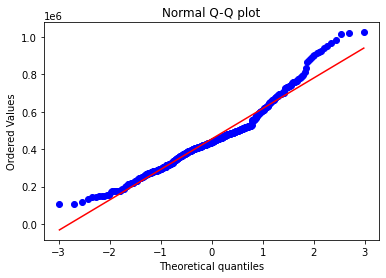

In [113]:
estat(df.MEDV,'Valores médios das casas')

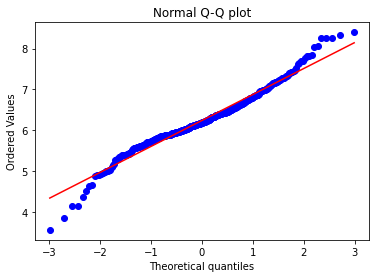

In [114]:
estat(df.RM,'Números de quartos')

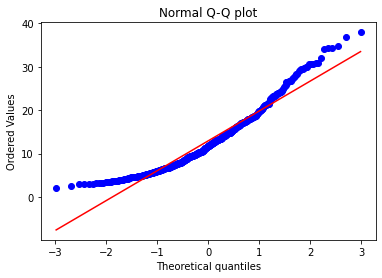

In [116]:
estat(df.LSTAT,'Classe baixa')

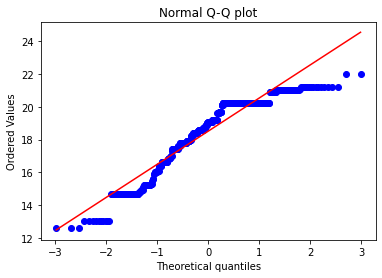

In [117]:
estat(df.PTRATIO,"Estudante/professores")